<a href="https://colab.research.google.com/github/BhargaviM0729/Binary-Image-classification-Cats-vs-Dogs-using-CNNs/blob/main/CatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning requires alot of data.

In [ ]:
!mkdir ~p./kaggle # creating a directory

mkdir: cannot create directory ‘~p./kaggle’: No such file or directory


In [ ]:
!cp kaggle_dogsvscats.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:36<00:00, 32.9MB/s]
100% 1.06G/1.06G [00:36<00:00, 31.6MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip  -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [ ]:
!pip3 install tensorflow numpy matplotlib keras

In [ ]:
!pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np



In [ ]:
cat_directory_path = '/content/dogs_vs_cats/train/cats'
dogs_directory_path = '/content/dogs_vs_cats/train/dogs'

In [ ]:
len(os.listdir(cat_directory_path)), len(os.listdir(dogs_directory_path))

(10000, 10000)

In [ ]:
#Loading some of the images

# Cv2 numpy or PIL image

array([[[ 75, 112, 140],
        [ 75, 112, 140],
        [ 79, 116, 144],
        ...,
        [ 54,  77, 127],
        [ 58,  77, 120],
        [ 32,  49,  88]],

       [[ 71, 108, 136],
        [ 72, 109, 137],
        [ 78, 115, 143],
        ...,
        [ 56,  79, 129],
        [ 68,  87, 130],
        [ 22,  39,  78]],

       [[ 53,  88, 114],
        [ 55,  90, 116],
        [ 63,  98, 124],
        ...,
        [ 44,  67, 117],
        [ 70,  89, 134],
        [  3,  21,  62]],

       ...,

       [[ 68,  78,  85],
        [ 55,  65,  72],
        [ 43,  54,  62],
        ...,
        [ 52,  80,  91],
        [ 54,  78,  90],
        [ 55,  79,  91]],

       [[ 56,  66,  73],
        [ 46,  56,  63],
        [ 39,  50,  58],
        ...,
        [ 70,  98, 109],
        [ 66,  90, 102],
        [ 61,  85,  97]],

       [[ 49,  59,  66],
        [ 42,  52,  59],
        [ 38,  49,  57],
        ...,
        [ 70,  98, 109],
        [ 59,  83,  95],
        [ 54,  78,  90]]], dtype=uint8)
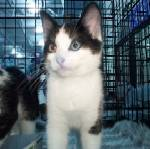

In [ ]:
cat_image = '/content/dogs_vs_cats/train/cats/cat.1000.jpg'
import cv2

img = cv2.imread(cat_image)
img

In [ ]:
print(img)

[[[ 75 112 140]
  [ 75 112 140]
  [ 79 116 144]
  ...
  [ 54  77 127]
  [ 58  77 120]
  [ 32  49  88]]

 [[ 71 108 136]
  [ 72 109 137]
  [ 78 115 143]
  ...
  [ 56  79 129]
  [ 68  87 130]
  [ 22  39  78]]

 [[ 53  88 114]
  [ 55  90 116]
  [ 63  98 124]
  ...
  [ 44  67 117]
  [ 70  89 134]
  [  3  21  62]]

 ...

 [[ 68  78  85]
  [ 55  65  72]
  [ 43  54  62]
  ...
  [ 52  80  91]
  [ 54  78  90]
  [ 55  79  91]]

 [[ 56  66  73]
  [ 46  56  63]
  [ 39  50  58]
  ...
  [ 70  98 109]
  [ 66  90 102]
  [ 61  85  97]]

 [[ 49  59  66]
  [ 42  52  59]
  [ 38  49  57]
  ...
  [ 70  98 109]
  [ 59  83  95]
  [ 54  78  90]]]


Try reading the images into pil format and numpy and also do data analysis

**Building the model**

In [ ]:
base_dir = '/content/dogs_vs_cats/train'

train_datagen = ImageDataGenerator(rescale = 1./225, validation_split = 0.2)

In [ ]:
# Creating batches of images one is regarding training dataset and another one is regarding validation dataset

# Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150), # Resizing images to 150x150
    batch_size = 20,
    class_mode = 'binary', # since we use binary _cross entropy loss we need binary labels
    subset = 'training') # set as training data


Found 16000 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'validation',
    shuffle = False # Disable shuffling for validation data
)

Found 4000 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
 model = models.Sequential([
        # layer 1
        layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)),
        layers.MaxPooling2D(2,2),

        # layer 2
        layers.Conv2D(64,(3,3),activation = 'relu'),
        layers.MaxPooling2D(2,2),

        # layer 3
        layers.Conv2D(128,(3,3),activation = 'relu'),
        layers.MaxPooling2D(2,2),

        # layer 1
        layers.Conv2D(128,(3,3),activation = 'relu', input_shape = (150,150,3)),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),

        layers.Dense(512,activation = 'relu'),
        layers.Dense(1,activation = 'sigmoid')
])

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
          epochs = 5,
          validation_data = validation_generator)

Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 843s 1s/step - accuracy: 0.8650 - loss: 0.3056 - val_accuracy: 0.8270 - val_loss: 0.4175
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 860s 1s/step - accuracy: 0.8967 - loss: 0.2445 - val_accuracy: 0.8475 - val_loss: 0.3703
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 856s 1s/step - accuracy: 0.9237 - loss: 0.1872 - val_accuracy: 0.8518 - val_loss: 0.4121
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 839s 1s/step - accuracy: 0.9492 - loss: 0.1301 - val_accuracy: 0.8407 - val_loss: 0.4964
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 836s 1s/step - accuracy: 0.9667 - loss: 0.0891 - val_accuracy: 0.8405 - val_loss: 0.5377


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(acc, val_acc, loss, val_loss)

[0.863937497138977, 0.8958749771118164, 0.9211875200271606, 0.9469375014305115, 0.9634374976158142] [0.8270000219345093, 0.8475000262260437, 0.8517500162124634, 0.840749979019165, 0.840499997138977] [0.31132668256759644, 0.2504195272922516, 0.19078367948532104, 0.13362962007522583, 0.09610006958246231] [0.41754353046417236, 0.3703453540802002, 0.4121240973472595, 0.49636974930763245, 0.5376513004302979]


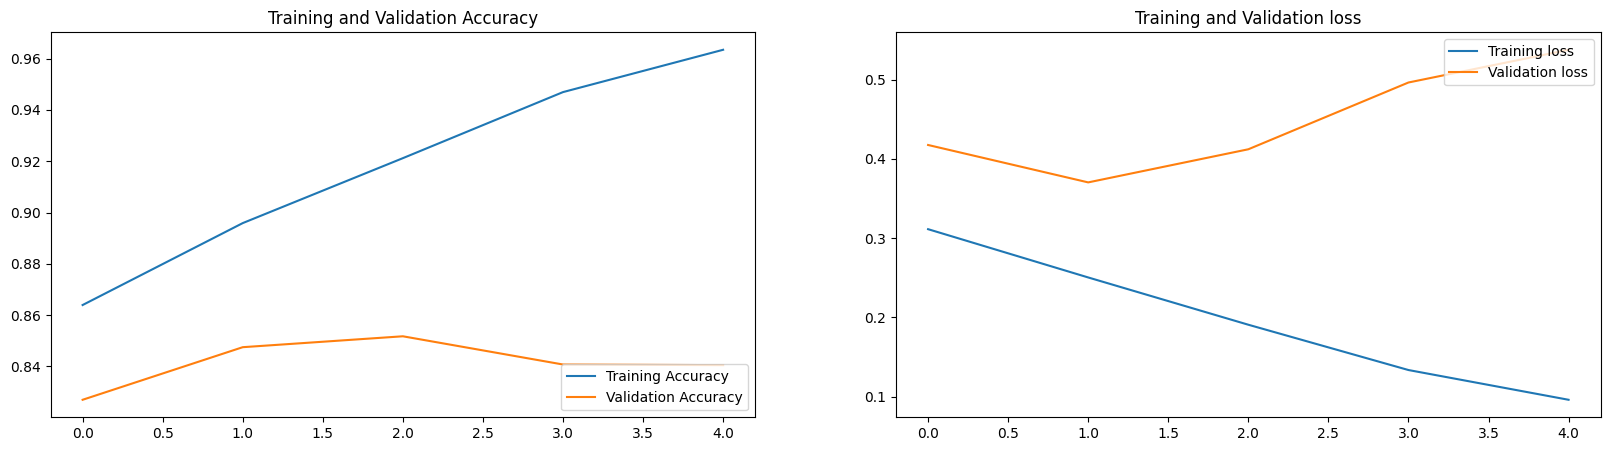

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range (len(acc))

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label = 'Training loss')
plt.plot(epochs_range, val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()


Testing and Inference

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_dir = '/content/dogs_vs_cats/test'
test_generator = test_datagen.flow_from_directory(
           test_dir,
           target_size = (150,150), # should match input size of your network
           batch_size = 20, # can adjust based on your memory contraints
           class_mode = 'binary', # we do not need the labels here
           shuffle = False)


Found 5000 images belonging to 2 classes.


In [ ]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(test_generator, steps = len(test_generator))

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 299ms/step - accuracy: 0.8605 - loss: 0.4164
Test loss: 0.48783159255981445
Test accuracy: 0.8503999710083008


Confusion matrix

Single Image prediction

In [ ]:
probabilities = model.predict(test_generator)
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 300ms/step


array([[2.9203692e-04],
       [2.5605027e-02],
       [1.2337763e-04],
       ...,
       [6.2925625e-01],
       [8.7494051e-01],
       [9.9979055e-01]], dtype=float32)

In [ ]:
 predicted_classes = (probabilities>0.5).astype(int).squeeze()
 predicted_classes

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
# If you need the actual class labels of 0/1, you can map the predicted classes back to the original labels
class_labels = list(test_generator.class_indices.keys())
predicted_labels = [class_labels[i] for i in predicted_classes]

In [ ]:
# Get the true labels from the test generator
true_classes = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm

array([[2142,  358],
       [ 390, 2110]])

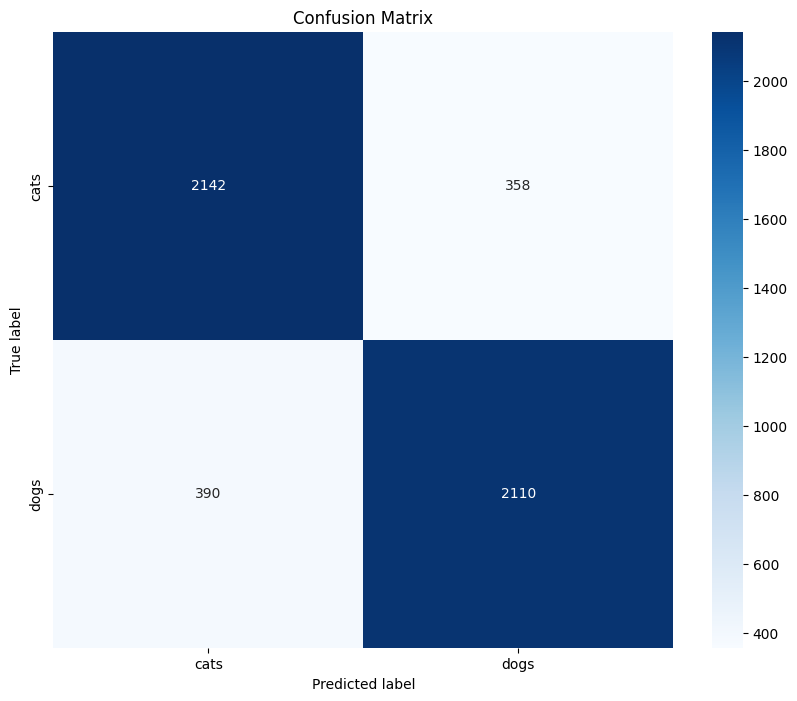

In [ ]:
# Plotting with seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = 'Blues', xticklabels = class_labels,yticklabels = class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
test_image = '/content/dogs_vs_cats/test/cats/cat.10046.jpg'
load_img(test_image,target_size = (150,150) ) # Resizing the image
img_array = img_to_array(img) # converting to array
print(img_array.shape)
img_array = np.expand_dims(img_array, axis = 0) # Add batch dimension
img_array /= 255

img_array.shape

(149, 150, 3)


(1, 149, 150, 3)

In [ ]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[0.00021946]], dtype=float32)

In [ ]:
print(test_image)

/content/dogs_vs_cats/test/cats/cat.10046.jpg


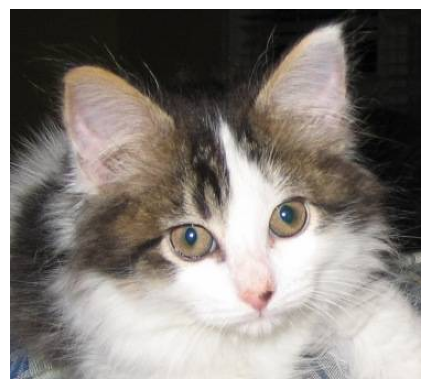

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Replace 'your_image_path_here' with your image path
image_path = '/content/dogs_vs_cats/test/cats/cat.10046.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150,150)) # Resizing the image
    img_array = img_to_array(img) # Converting to array
    img_array = np.expand_dims(img_array, axis = 0) # Add batch dimension
    img_array/= 255. # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:",prediction)

    # Original Image
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1,2,2)
    if prediction [0][0]> 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)
    plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: [[0.9919855]]


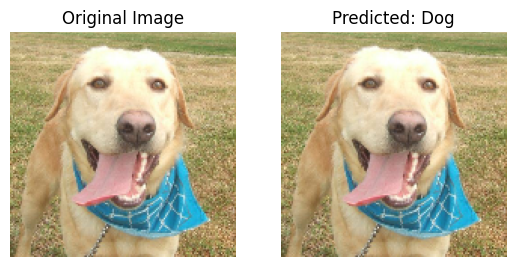

In [ ]:
# Load and preprocess the image
img_path = '/content/test/dogs/dog.10067.jpg'
make_prediction(img_path)